Used to stitch different data sources together. The data sources are:
carracing standard (green, red, blue), carracing bus (green)

In [1]:
import pickle
import os

print(os.path.abspath(os.curdir))
os.chdir("..")
print(os.path.abspath(os.curdir))

/Users/antonioricciardi/projects/rl_relrepr_gymnasium/notebooks
/Users/antonioricciardi/projects/rl_relrepr_gymnasium


In [2]:
sources = ["data/anchors/CarRacing-v2/rgb_ppo_transitions_green_obs.pkl", "data/anchors/CarRacing-v2/rgb_ppo_transitions_red_obs.pkl", "data/anchors/CarRacing-v2-bus/rgb_ppo_transitions_green_obs.pkl", "data/anchors/CarRacing-v2-tuktuk/rgb_ppo_transitions_green_obs.pkl"]

In [3]:
# print working directory
print(os.getcwd())

/Users/antonioricciardi/projects/rl_relrepr_gymnasium


In [4]:
data0 = pickle.load(open(sources[0], "rb"))
data1 = pickle.load(open(sources[1], "rb"))
data2 = pickle.load(open(sources[2], "rb"))
data3 = pickle.load(open(sources[3], "rb"))

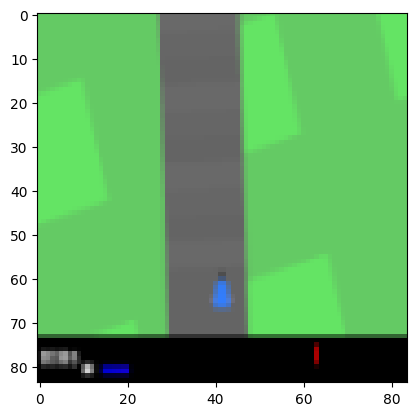

In [5]:
# plot ith element of data0
import matplotlib.pyplot as plt
import numpy as np
import cv2

i = 222
obs = data3[i]
plt.imshow(obs.transpose(1, 2, 0))
plt.show()

In [6]:
# join data0 and data1, 2000 elements for each, totalling 4000
data = data0[:1000] + data1[:2000] + data2[:1000] + data3[:1000]

In [7]:
os.makedirs("data/anchors/CarRacing-v2-unified", exist_ok=True)

In [8]:
# save the joined data
pickle.dump(data, open("data/anchors/CarRacing-v2-unified/rgb_ppo_transitions_red_green_bus_tuktuk_obs.pkl", "wb"))

# Dataset augmentation

In [9]:
# load lunar lander data
data = pickle.load(open("data/anchors/LunarLanderRGB/rgb_ppo_transitions_white_obs.pkl", "rb"))

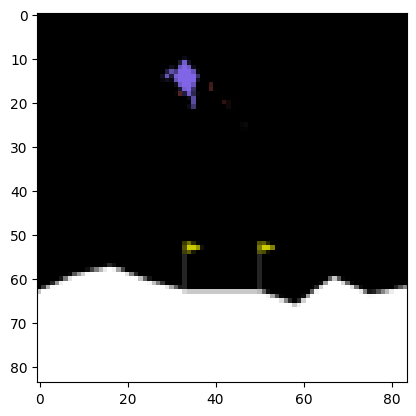

In [10]:
# plot example data
i = 800
obs = data[i]
plt.imshow(obs.transpose(1, 2, 0))
plt.show()


In [11]:
# perform random data augmentation. Randomly flip, rotate, shift.
data_augmented = []
for i in range(len(data)):
    obs = data[i]
    if np.random.rand() < 0.5:
        obs = np.flip(obs, axis=1)
    if np.random.rand() < 0.5:
        obs = np.flip(obs, axis=2)
    if np.random.rand() < 0.5:
        obs = np.rot90(obs, k=np.random.randint(4))
    if np.random.rand() < 0.5:
        shift = np.random.randint(-10, 10, 2)
        obs = np.roll(obs, shift, axis=(1, 2))
    data_augmented.append(obs)



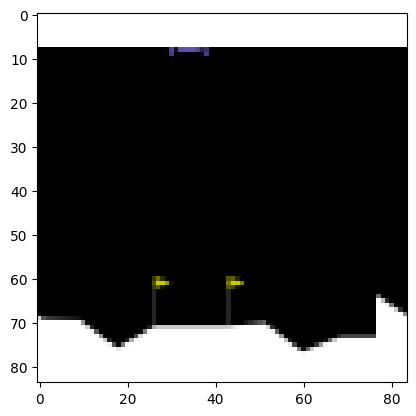

In [15]:
# show augmented data
i = 5
obs = data_augmented[i]
plt.imshow(obs.transpose(1, 2, 0))
plt.show()

In [18]:
# save augmented data
pickle.dump(data_augmented, open("data/anchors/LunarLanderRGB/rgb_ppo_transitions_white_obs_augmented.pkl", "wb"))
